## Leitura e Preprocessamento dos Dados

### Requirements

In [30]:
import pandas as pd
import numpy as np
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import altair as alt
import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Leitura e Concatenação 

In [31]:
path = os.getcwd()
files = glob.glob(os.path.join(path, "output/*/*.json"))

In [32]:
jsons = [pd.read_json(file, lines=True) for file in files]
df = pd.concat(jsons, ignore_index=True)

df["subject"] = [os.path.split(os.path.dirname(file))[-1] for file in files]

In [33]:
df

,title,abstract,subject
0,Modelagem de reforma catalítica seca de metano...,Estamos vivenciando o início da Era da Informa...,machinelearning
1,Aplicação de machine learning para apostas esp...,As práticas esportivas surgiram de atividades ...,machinelearning
2,Social machines: a unified paradigm to describ...,"The open, distributed approach of the Web and ...",machinelearning
3,Um método de aprendizagem seqüencial com filtr...,"Em aplicações de aprendizagem de máquina, é co...",machinelearning
4,Development of machine and deep learning based...,Artificial intelligence-based algorithms have ...,machinelearning
5,Automação de controle de acesso por reconhecim...,Esta pesquisa tem como objetivo propor um méto...,machinelearning
6,Visão computacional aplicada a gestão da manut...,O desgaste progressivo de peças rotativas como...,machinelearning
7,A machine learning-based methodology for autom...,Oil refineries process hazardous substances at...,machinelearning
8,Time Aware Sigmoid Optimization : a new learni...,The correct choice of hyperparameters for the ...,machinelearning
9,Time series forecasting with deep forest regre...,A time series is a collection of ordered obser...,machinelearning


In [34]:
df.describe()

,title,abstract,subject
count,60,60,60
unique,60,60,6
top,Modelagem de reforma catalítica seca de metano...,Estamos vivenciando o início da Era da Informa...,machinelearning
freq,1,1,10


### Stopwords

English and portuguese

In [35]:
languages = ['english', 'portuguese']

In [36]:
list_stop = stopwords.words(languages)
print(list_stop[:10])
print(list_stop[-10:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['tivessem', 'tivéssemos', 'tu', 'tua', 'tuas', 'um', 'uma', 'você', 'vocês', 'vos']


### Preprocessing

In [37]:
corpus = df['abstract'].copy()
preprocessed_corpus = []

for abstract in corpus:
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(abstract))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    #Normalize
    document = unidecode(document)
    
    document = document.split()
    
    document = [word for word in document if word not in list_stop and word.isalpha()]
    
    document = " ".join(document)
        
    preprocessed_corpus.append(document)

In [38]:
print(len(corpus))
print(len(preprocessed_corpus))

60
60


### Feature Extration

In [39]:
count_vect = CountVectorizer(stop_words=list_stop, min_df=0.05, max_df=0.99)
count_vect.fit(preprocessed_corpus)

CountVectorizer(max_df=0.99, min_df=0.05,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [40]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  572
Quantidade total de palavras:  163306


#### TF-IDF

In [41]:
X = count_vect.transform(preprocessed_corpus)

In [42]:
X.shape

(60, 572)

In [43]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X)

TfidfTransformer()

In [44]:
X_tfidf = tfidf_transformer.transform(X)

In [45]:
X_tfidf.shape

(60, 572)

In [46]:
count_vect.get_feature_names_out()

array(['abordagem', 'abordagens', 'acerca', 'acesso', 'acoes', 'acordo',
       'adultos', 'agrupamento', 'agua', 'ainda', 'alem', 'algumas',
       'alguns', 'aliada', 'alta', 'alteracoes', 'alto', 'ambas',
       'ambientais', 'ambiental', 'ambiente', 'ambientes', 'ambos',
       'analisada', 'analisadas', 'analisados', 'analisar', 'analise',
       'analises', 'ano', 'anos', 'apenas', 'apesar', 'aplicacao',
       'apontam', 'apos', 'aprendizagem', 'apresenta', 'apresentado',
       'apresentam', 'apresentando', 'apresentar', 'apresentaram',
       'apresentou', 'aproximadamente', 'aquecimento', 'area', 'areas',
       'arquitetos', 'arquitetura', 'arte', 'artes', 'artigos',
       'artisticos', 'aspectos', 'assim', 'ate', 'atencao', 'atividade',
       'atividades', 'atlantica', 'atraves', 'aumento', 'avaliadas',
       'avaliados', 'avaliar', 'avanco', 'baixa', 'baixo', 'base',
       'bases', 'basica', 'basico', 'bem', 'bens', 'boa', 'brasil',
       'brasileira', 'brasileiras', 

### Análise das Caracteristicas textuais

In [47]:
sorted_X_indices = np.argsort(X.toarray(), axis=1)[:, ::-1]
sorted_Xtfidf_indices = np.argsort(X_tfidf.toarray(), axis=1)[:,::-1]

print('Termos mais comuns nos 10 primeiros documentos:')
for i in range(10):
    print(count_vect.get_feature_names_out()[sorted_X_indices[i, :3]])

print('\nTermos mais relevantes nos 10 primeiros documentos:')
for i in range(10):
    print(count_vect.get_feature_names_out()[sorted_Xtfidf_indices[i, :3]])

print('\nTermos mais relevantes na base de dados:')
mean_Xtfidf = X_tfidf.mean(axis=0)
sorted_meanXtfidf_indices = np.argsort(mean_Xtfidf)[::-1]
print(count_vect.get_feature_names_out()[sorted_meanXtfidf_indices[:3]])

Termos mais comuns nos 10 primeiros documentos:
['gas' 'modelos' 'processos']
['dados' 'resultados' 'regressao']
['social' 'machines' 'software']
['metodo' 'aprendizagem' 'learning']
['context' 'support' 'models']
['atraves' 'metodo' 'modelo']
['meio' 'imagens' 'neural']
['svm' 'way' 'used']
['network' 'different' 'three']
['series' 'time' 'performance']

Termos mais relevantes nos 10 primeiros documentos:
['gas' 'modelos' 'processos']
['regressao' 'dados' 'possivel']
['social' 'machines' 'software']
['aprendizagem' 'metodo' 'proposto']
['context' 'support' 'models']
['acesso' 'software' 'feita']
['imagens' 'meio' 'network']
['svm' 'way' 'vector']
['network' 'different' 'three']
['series' 'time' 'performance']

Termos mais relevantes na base de dados:
[['hipoteses' 'sugere' 'polimorficos' 'contudo' 'alguns' 'adultos' 'novo'
  'possam' 'incluindo' 'paraiba' 'sanitario' 'distrito' 'relacionadas'
  'condicao' 'composta' 'acoes' 'natureza' 'tecnica' 'oferecer'
  'comparados' 'acordo' 'medi

### Visualisation

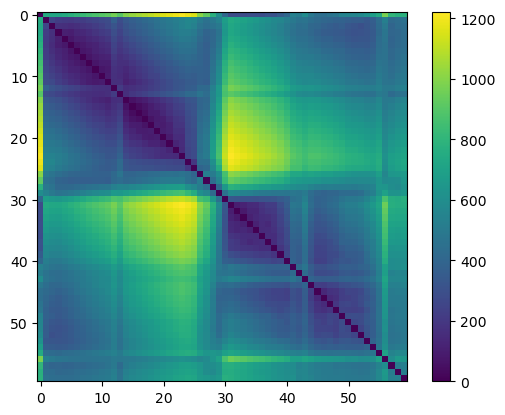

In [48]:
p = pairwise_distances(np.argsort(X_tfidf.toarray(), axis=0)[:,::-1], metric='euclidean')
plt.imshow(p, interpolation='nearest')
plt.colorbar()

In [49]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), index=df['subject'], columns=count_vect.get_feature_names_out())
tfidf_df = tfidf_df.groupby('subject').mean()
tfidf_df.head()

,abordagem,abordagens,acerca,acesso,acoes,acordo,adultos,agrupamento,agua,ainda,...,velocidade,vem,verificar,verificou,vez,viabilidade,vida,visando,vista,way
subject,,,,,,,,,,,,,,,,,,,,,
aquecimento_global,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.023096,0.00000,...,0.07388,0.000000,0.000000,0.026850,0.000000,0.026270,0.010785,0.038725,0.007353,0.000000
bauhaus_arquitetura,0.000000,0.011741,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.010454,0.000000,0.006976,0.000000,0.000000,0.007638,0.000000,0.021030,0.000000
economiabrasileira,0.021360,0.011750,0.01355,0.00000,0.0000,0.009807,0.000000,0.000000,0.000000,0.04893,...,0.00000,0.000000,0.009285,0.030750,0.007982,0.000000,0.000000,0.000000,0.000000,0.000000
genetica,0.000000,0.000000,0.00830,0.00000,0.0083,0.005832,0.021063,0.038643,0.000000,0.00490,...,0.00000,0.000000,0.024262,0.000000,0.033341,0.007747,0.000000,0.005482,0.012334,0.000000
machinelearning,0.007304,0.008197,0.00000,0.03474,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.009304,0.000000,0.024264,0.000000,0.009304,0.009816,0.000000,0.042292


In [50]:
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df.head()

,subject,level_1,0
0,aquecimento_global,abordagem,0.0
1,aquecimento_global,abordagens,0.0
2,aquecimento_global,acerca,0.0
3,aquecimento_global,acesso,0.0
4,aquecimento_global,acoes,0.0


In [51]:
tfidf_df = tfidf_df.rename(columns={0:'TFIDF', 'subject': 'Tema','level_1': 'Termo'})
tfidf_df

,Tema,Termo,TFIDF
0,aquecimento_global,abordagem,0.000000
1,aquecimento_global,abordagens,0.000000
2,aquecimento_global,acerca,0.000000
3,aquecimento_global,acesso,0.000000
4,aquecimento_global,acoes,0.000000
...,...,...,...
3427,saudeinfantil,viabilidade,0.000000
3428,saudeinfantil,vida,0.011567
3429,saudeinfantil,visando,0.000000
3430,saudeinfantil,vista,0.008025


In [52]:
top_tfidf = tfidf_df.sort_values(by=['Tema','TFIDF'], ascending=[True,False]).groupby(['Tema']).head(3)
top_tfidf

,Tema,Termo,TFIDF
45,aquecimento_global,aquecimento,0.170861
524,aquecimento_global,temperatura,0.089659
501,aquecimento_global,sistema,0.084931
716,bauhaus_arquitetura,design,0.256469
621,bauhaus_arquitetura,arquitetura,0.138594
622,bauhaus_arquitetura,arte,0.121672
1321,economiabrasileira,economia,0.236225
1287,economiabrasileira,desenvolvimento,0.080561
1221,economiabrasileira,brasileira,0.075753
1957,genetica,genetica,0.298499


In [53]:
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['TFIDF'] = top_tfidf_plusRand['TFIDF'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'Tema:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("TFIDF", order="descending")],
    groupby = ["Tema"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'TFIDF:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'Termo:N',
    color = alt.condition(alt.datum.TFIDF >= 0.2, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

/home/studio-lab-user/.conda/envs/cesarnlp/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

## Topic Modelling

In [54]:
from sklearn.decomposition import TruncatedSVD

In [55]:
X_tfidf

<60x572 sparse matrix of type '<class 'numpy.float64'>'
	with 3068 stored elements in Compressed Sparse Row format>

In [56]:
def get_explained_var(n_components, X_tfidf):
    svd = TruncatedSVD(n_components=n_components, n_iter=10 , random_state=0)
    svd.fit(X_tfidf)
    return sum(svd.explained_variance_ratio_)

In [57]:
explained_var = []

for n_components in range(1, 65):
    var = get_explained_var(n_components, X_tfidf)
    explained_var.append(var)    

<AxesSubplot: >

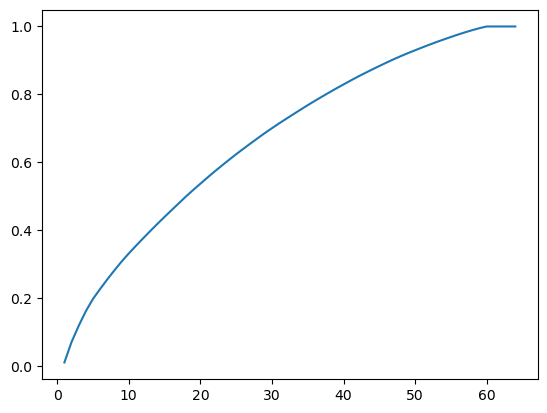

In [58]:
sns.lineplot(x=range(1, 65), y=explained_var)